In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import glob

def leerCarpeta(path):
    path = path+'/*.jpg'   
    files = glob.glob(path)
    imagenes = []
    for name in files: 
        imagen = cv2.imread(name)
        if ( not np.all(imagen == 255) and not np.all(imagen == 0)):
            imagenes.append(imagen)
    return imagenes

In [3]:
filtroMediana = lambda t: cv2.medianBlur(t,3)
unCentimo = np.array([filtroMediana(x) for x in leerCarpeta('train/1c')])
unEuro = np.array([filtroMediana(x) for x in leerCarpeta('train/1e')])
dosCentimos = np.array([filtroMediana(x) for x in leerCarpeta('train/2c')])
dosEuros = np.array([filtroMediana(x) for x in leerCarpeta('train/2e')])
cincoCentimos = np.array([filtroMediana(x) for x in leerCarpeta('train/5c')])
diezCentimos = np.array([filtroMediana(x) for x in leerCarpeta('train/10c')])
veinteCentimos = np.array([filtroMediana(x) for x in leerCarpeta('train/20c')])
cincuentaCentimos = np.array([filtroMediana(x) for x in leerCarpeta('train/50c')])

In [4]:
image = unCentimo[0]
winSize = (32,32)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
#compute(img[, winStride[, padding[, locations]]]) -> descriptors
winStride = (8,8)
padding = (8,8)
locations = ((10,20),)
hist = hog.compute(image,winStride,padding,locations)
print(hist.shape)

(324, 1)


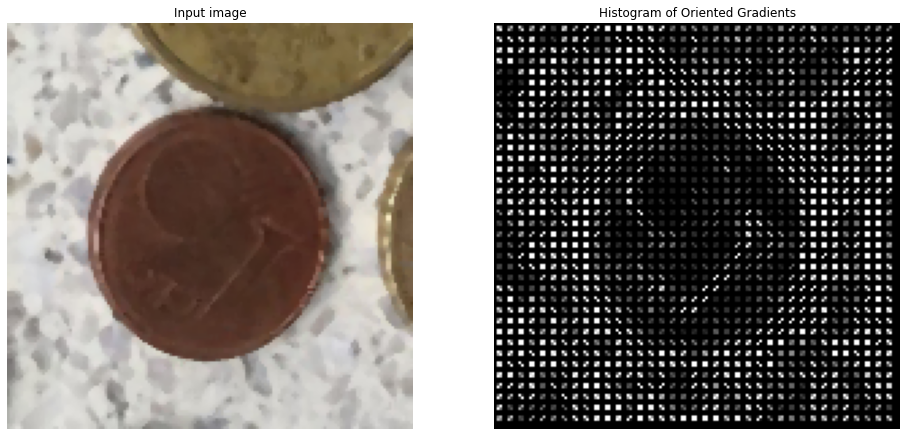

(150, 150) (16428,)


In [6]:

from skimage.feature import hog
from skimage import data, exposure


image = unCentimo[42]

dim = image.shape[0]
dim_cel = 4
orientaciones = 12
fd, hog_image = hog(image, orientations=orientaciones, pixels_per_cell=(dim_cel, dim_cel),
                    cells_per_block=(1, 1), visualize=True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
hist = fd.reshape(dim//dim_cel, dim//dim_cel, orientaciones)
print(hog_image.shape, fd.shape)

In [ ]:
rotar los ejemplos:
    calcular un error respecto a un ejemplo y cojer el error minimo entre todas las direcciones posibles